# Proyecto Machine Learning Clasificación: Dataset Spotify

In [57]:
#https://www.youtube.com/watch?v=OYM0fNeYstk

In [1]:
#curl -X GET \
"https://datasets-server.huggingface.co/rows?dataset=RTVS%2FSpotifyLyrics001&config=default&split=train&offset=0&length=100"

'https://datasets-server.huggingface.co/rows?dataset=RTVS%2FSpotifyLyrics001&config=default&split=train&offset=0&length=100'

In [2]:
#tratamiento de datos:
import pandas as pd
import numpy as np


#modelos y preprocesado
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge, Lasso


#graficos 

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
df = pd.read_parquet('0000.parquet')

In [4]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df.isnull().sum()                               #ocurren en el mismo registro?

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)].index

Index([65900], dtype='int64')

In [8]:
df.iloc[65900]      #los 3 registros None aparecen en la posición 65900, probable fallo en cambio de alfabeto

Unnamed: 0                           65900
track_id            1kR4gIb7nGxHPI3D2ifs59
artists                               None
album_name                            None
track_name                            None
popularity                               0
duration_ms                              0
explicit                             False
danceability                         0.501
energy                               0.583
key                                      7
loudness                             -9.46
mode                                     0
speechiness                         0.0605
acousticness                          0.69
instrumentalness                   0.00396
liveness                            0.0747
valence                              0.734
tempo                              138.391
time_signature                           4
track_genre                          k-pop
Name: 65900, dtype: object

In [9]:
df.dropna(inplace=True)                 # No hay NaN's (nulos)

In [10]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
df.duplicated().sum()  # No hay duplicados

0

In [12]:
df.shape

(113999, 21)

In [13]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [14]:
df['explicit'] = df['explicit'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  int32  
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [16]:
df.describe(include='all')                          #Aqui hay duplicados? Track ID? Por qué Nans si son float o int?            Si una variable es float, la entiende como float. Al sacarlo en popularity, es un problema de regresión que luego se puedde categorizar.

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,113999.000000,113999,113999,113999,113999,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,...,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999
unique,NaN,89740,31437,46589,73608,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.421925,NaN,NaN,NaN,NaN,33.238827,2.280312e+05,0.085501,0.566801,0.641383,...,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,NaN
std,32909.243463,NaN,NaN,NaN,NaN,22.304959,1.072961e+05,0.279627,0.173543,0.251530,...,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,0.000000,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.500000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,0.000000,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,NaN
50%,56999.000000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,0.000000,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.500000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,0.000000,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


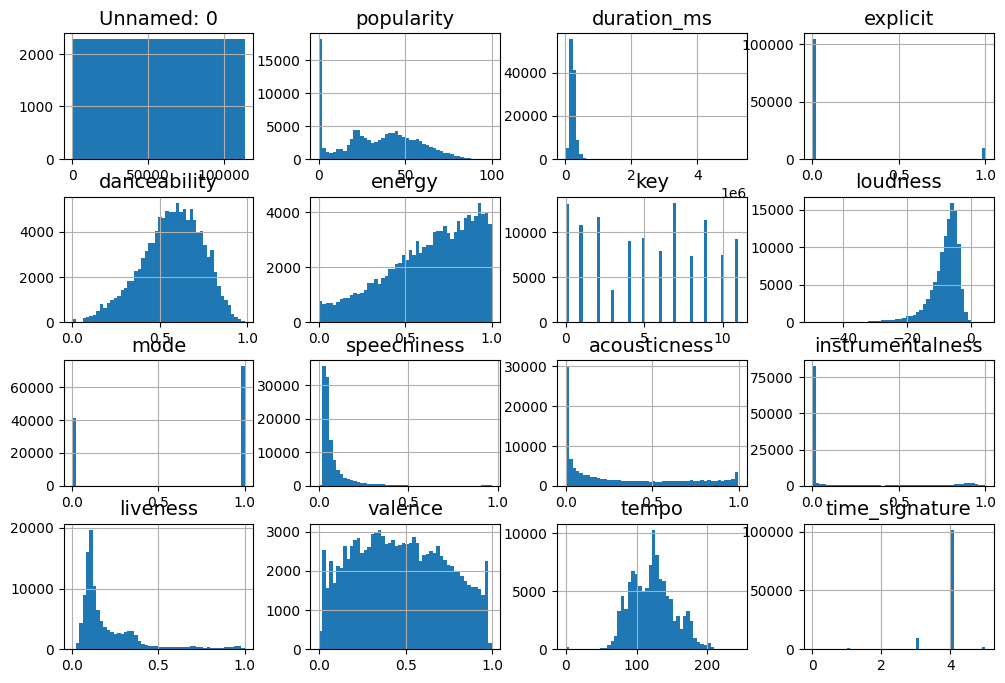

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', size=6)
plt.rc('axes', labelsize=20, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [18]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [19]:
df['track_genre'].nunique()                 #buscar generos principales. Con pocos registros, ensucia. Categorías pequeñas se eliminan. 

114

In [20]:
df_clean = df.drop(columns=['track_id', 'track_name' ,'artists', 'album_name', 'Unnamed: 0'])

In [21]:
df_clean

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   explicit          113999 non-null  int32  
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  int64  
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  int64  
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
 15  track_genre       113999 non-null  object 
dtypes: float64(9), int32(1), 

In [23]:
df_clean['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [24]:
pd.DataFrame(df_clean['track_genre'].value_counts()).T                      #el dataset está perfectamente distribuido, por lo que será difícil reducir esta distribución.

track_genre,acoustic,afrobeat,psych-rock,progressive-house,power-pop,pop,pop-film,piano,party,pagode,...,garage,funk,french,forro,folk,emo,electronic,electro,world-music,k-pop
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,999


# Modelos Machine Learning 

##### Como vimos en el EDA , la popularidad es un valor relevante que informa del éxito de una canción. Este valor es calculado en función de una serie de métricas que trataremos de inferir con modelos de clasificación, ya que es una variable discreta.

##### Nuestro dataset cuenta con variables numéricas y una booleana, que trataremos en el preprocesamiento del modelo.

In [25]:
# Cuando se realiza el baseline? Antes o después del train test split. Se hace después sobre el train

In [26]:
print(df_clean['popularity'].mean())
print(df_clean['popularity'].median())                         #PARA REGRESION         

33.23882665637418
35.0


In [27]:
# Error de cada modelo contra el base. El modelo ha de mejorar respecto a estos valores. Todas las canciones tienen pop 35

In [28]:
df_clean.drop(columns=['track_genre'], inplace=True, errors= 'ignore')

In [29]:
df_clean

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [30]:
X = df_clean.copy()
y = df_clean[['popularity']]                       #VARIABLE ENDOGENA, A PREDECIR U OBJETIVO, SIN TRAINTEST SPLIT. Las categorías de popularidad para la regresión podrían inferir la popularidad.


In [31]:
X

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [32]:
X = df_clean.drop(columns=['popularity'])

In [33]:
X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [34]:
X.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

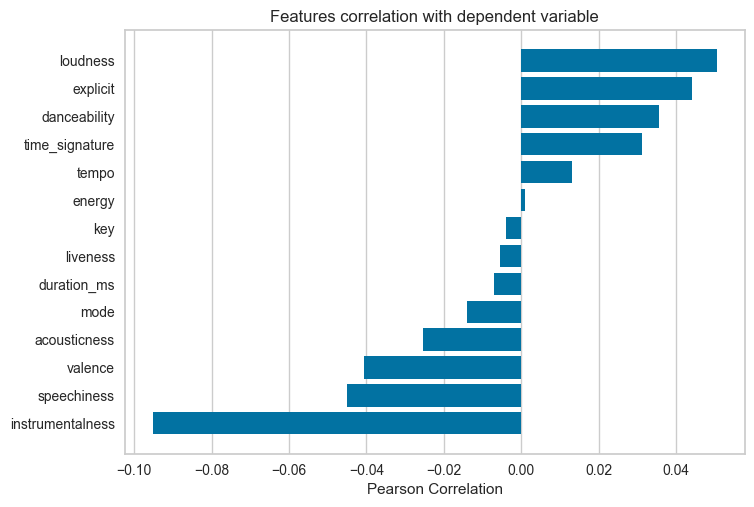

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [35]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']
X, y = df_clean.drop(columns=['popularity']), df_clean['popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=feature_names, sort=True)
visualizer.ax.set_title("Correlación de Características con Popularidad")

plt.rcParams['figure.figsize']=(20,10)
visualizer.fit(X,y)

visualizer.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(columns=['popularity']), df_clean['popularity'], test_size=0.2, random_state= 42)

In [37]:
X_train

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
96253,358733,0,0.641,0.880,11,-6.401,0,0.0604,0.1510,0.000761,0.6110,0.4230,93.000,4
70417,231520,0,0.668,0.361,5,-9.710,0,0.0353,0.7950,0.000000,0.2460,0.4320,73.919,3
66688,98386,0,0.786,0.225,9,-16.516,1,0.5730,0.6790,0.000000,0.2010,0.6580,110.066,4
51391,232173,0,0.709,0.829,0,-5.817,1,0.2450,0.0698,0.000000,0.5610,0.6540,137.954,4
95123,360320,0,0.786,0.702,0,-6.742,1,0.0456,0.5110,0.000000,0.1200,0.6960,104.030,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76821,238546,0,0.502,0.190,10,-11.985,1,0.0363,0.9200,0.858000,0.0838,0.1500,131.745,4
110269,310067,0,0.559,0.924,7,-5.017,1,0.0674,0.0105,0.884000,0.8640,0.1340,145.008,4
103695,136306,0,0.629,0.560,0,-11.455,0,0.0523,0.5950,0.000000,0.1820,0.8800,118.895,3
860,216841,0,0.421,0.107,6,-15.191,1,0.0335,0.9480,0.000000,0.0881,0.1180,104.218,4


In [38]:
print('registros train: ', len(X_train))
print('registros test: ' , len(X_test))
print('registros totales: ', len(X_train) + len(X_test))

registros train:  91199
registros test:  22800
registros totales:  113999


## Arbol de clasificación regresión

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [40]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [41]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "regression_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [42]:
df_clean

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [43]:
X = df_clean.drop(columns=['popularity'])
y = df_clean[['popularity']]

In [44]:
y

,popularity
0,73
1,55
2,57
3,71
4,82
...,...
113995,21
113996,22
113997,22
113998,41


In [45]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X[['key']]):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [46]:
tree_reg = DecisionTreeRegressor(max_depth=3 ,random_state=1312, min_samples_leaf=1000)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=1000, random_state=1312)

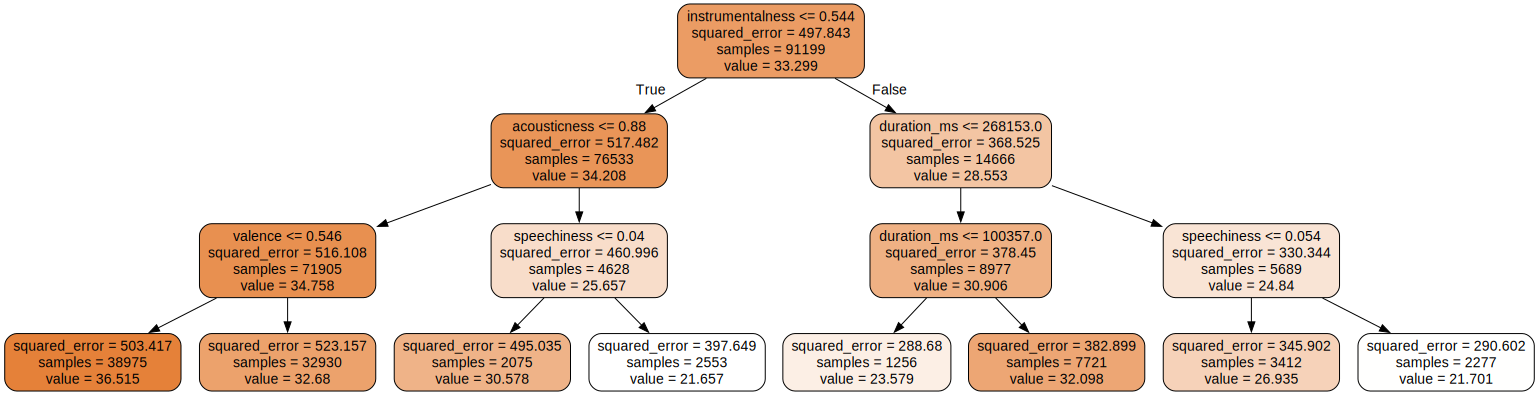

In [47]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=X_train.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [48]:
preds = set(tree_reg.predict(X_train))

In [49]:
# Errores

In [50]:
y_train.mean()

33.29864362547835

In [52]:
y_test

113186    50
42819     11
59311      0
90417     34
61000     57
          ..
83384     59
102335     0
78411     29
86528     42
96230     42
Name: popularity, Length: 22800, dtype: int64

In [55]:
pd.Series(preds)

TypeError: 'set' type is unordered

In [51]:
((y_test - preds.mean())**2).mean()

AttributeError: 'set' object has no attribute 'mean'

In [ ]:
y_train